===== Regression Metrics =====
R² Score       : 0.5103942572821251
Mean Absolute Error (MAE): 41.96450967184069
Mean Squared Error (MSE): 2817.808297221585
Root Mean Squared Error: 53.083032102749975

Accuracy : 0.815068493150685
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        76
           1       0.77      0.87      0.82        70

    accuracy                           0.82       146
   macro avg       0.82      0.82      0.81       146
weighted avg       0.82      0.82      0.81       146



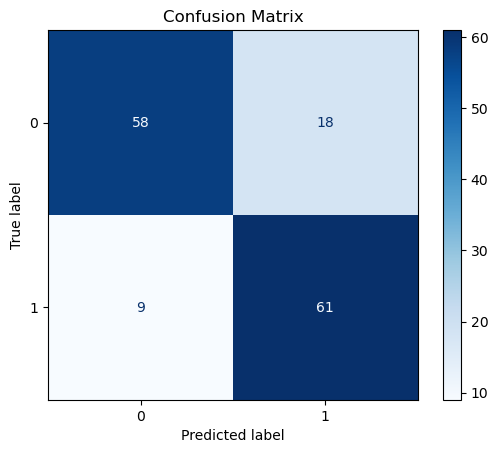

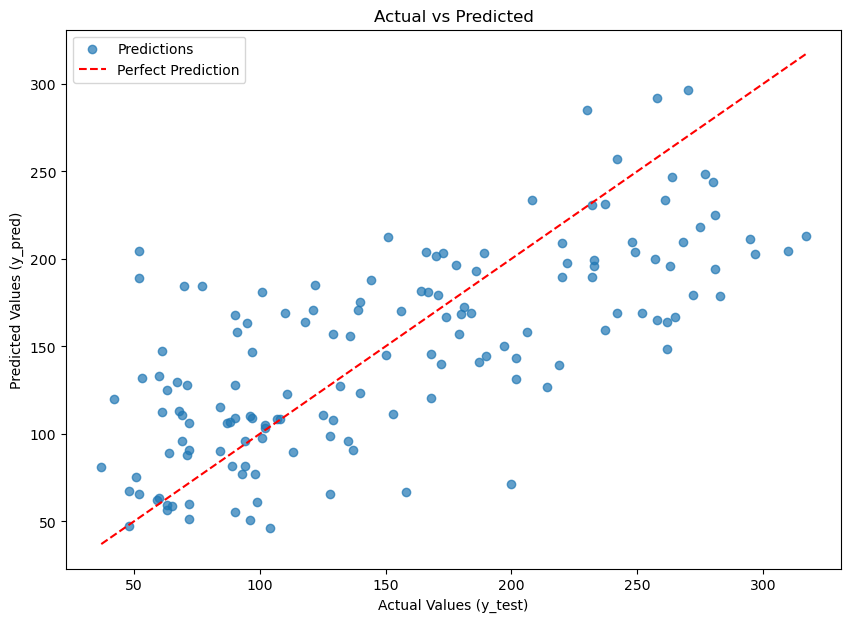

In [3]:
# Importing all the required libraries
import numpy as np                           # For numerical operations
import pandas as pd                          # For handling data in DataFrame
import matplotlib.pyplot as plt              # For plotting graphs

# Importing necessary modules from scikit-learn
from sklearn.linear_model import LinearRegression             # Linear Regression model
from sklearn.datasets import load_diabetes                    # Diabetes dataset (preloaded in sklearn)
from sklearn.model_selection import train_test_split          # To split data into training and testing
from sklearn.model_selection import cross_val_score           # For cross-validation (not used here, but imported)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
# For evaluation metrics and confusion matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Importing regression metrics


# ========================== Load and Prepare Data ==========================
df = load_diabetes()       # Load the diabetes dataset (real-world dataset of medical records)

# Converting the dataset to pandas DataFrames for easier analysis
X = pd.DataFrame(df['data'], columns=df['feature_names'])   # Features
y = pd.DataFrame(df['target'], columns=["Target"])          # Target variable (disease progression)

# Splitting the dataset into training and testing (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# ========================== Model Training ==========================
lin_reg = LinearRegression()      # Creating Linear Regression model
lin_reg.fit(X_train, y_train)     # Training the model with training data

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# ========================== Regression Evaluation ==========================

print("===== Regression Metrics =====")
print("R² Score       :", r2_score(y_test, y_pred))                               # How well the model fits (1 is perfect)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))         # Avg of absolute errors
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))           # Avg of squared errors
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))   # Square root of MSE to get error in original units
print()

# ========================== Converting to Classification ==========================
# Since Linear Regression is a regression model, we are manually converting it to a classification problem
# We'll define a threshold (median of y_train) to separate "low" and "high" disease progression
threshold = np.median(y_train)

# Now we convert the continuous predicted and actual values into 0 or 1 (binary classification)
y_pred_class = (y_pred >= threshold).astype(int)     # 1 if prediction >= threshold else 0
y_test_class = (y_test >= threshold).astype(int)     # Similarly for actual values

# ========================== Classification Evaluation ==========================
# Even though this is regression, we are checking how it performs as a classifier using binary labels

print("Accuracy :" ,accuracy_score(y_test_class, y_pred_class))  # How many predictions are correct

# Detailed report including Precision, Recall, and F1-Score
print("Classification Report : \n", classification_report(y_test_class, y_pred_class))

# Confusion Matrix shows TP, TN, FP, FN
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plotting the confusion matrix
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")

# ========================== Visualization of Predictions ==========================
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction')   # Line representing perfect prediction
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
